## Perception


<span class="motutor-highlight motutor-id_ah5tvlq-id_ecju3z7"><i></i>神经元的功能</span>：
+ 物理反应：将前序神经元所传递过来的信息按联结权重累加

$ 神经元i获得信息 = 神经元k信息 \times 联结权重k + 神经元l信息 \times 联结权重l + 神经元m信息 \times 联结权重m $

+ 化学反应：对神经元i获得的信息施以一个非线性变换（通过激活函数），激活若干信息、而非“来者不拒”
+ 信息流通：将神经元非线性变换后所得的信息继续向后传递

<span class="motutor-highlight motutor-id_b89tfyt-id_ymxeojx"><i></i>感知机模型</span>：
<table>
    <tr>
        <td ><img src="http://imgbed.momodel.cn/感知器模型.png" width=300/></td>
        <td><img src="http://imgbed.momodel.cn//20200208141322.png" width=400></td>
    </tr>
</table>

**输入项**：3个，$x_1,x_2,x_3$  
**神经元**：1个，用圆圈表示  
**权重**：每个输入项均通过权重与神经元相连（比如 $w_i$ 是 $x_i$ 与神经元相连的权重）    
**输出**：1个

<span class="motutor-highlight motutor-id_b89tfyt-id_yfx2zle"><i></i><b>工作方法</b></span>:
+ 计算输入项传递给神经元的信息加权总和，即：$y_{sum} = w_1x_1+w_2x_2+w_3x_3$
+ 如果 $y_{sum}$ 大于某个预定阀值（比如 0.5），则输出为 1，否则为 0 。

我们根据上面的定义可以编写一个简单的感知机模型。

In [6]:
def perceptron(x, w, threshold):
    """
    感知机模型
    :param x: 输入数据 np.array 格式
    :param w: 权重 np.array 格式，需要与 x 一一对应
    :param threshold: 阀值
    :return: 0或者1
    """
    x = np.array(x)
    w = np.array(w)
    
    #计算信息加权总和
    y_sum = np.sum(w * x)
    
    # 大于阀值返回 1，否则返回 0
    return 1 if y_sum > threshold else 0



# 输入数据
x = np.array([1, 1, 4])
# 输入权重
w = np.array([0.5, 0.2, 0.3])
# 返回结果
perceptron(x, w, 0.8)

1

上一个感知机模型只能进行判断，而神经网络模型最重要的是进行学习，下面我们通过一个实际的例子，看看感知机是如何学习分类能力的。

简单假设一个分类问题，我们有两种颜色的点分布在空间中:

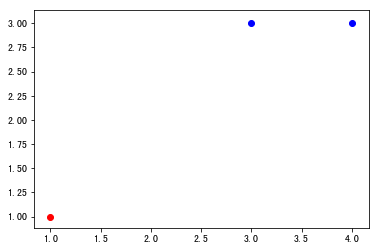

In [7]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

import numpy as np
X = np.array([[1, 1], [3, 3], [4, 3]])
y = [-1, 1, 1]

    
# 绘制散点图
for i, x in zip(y,X):
    if i == -1:
        plt.scatter(x[0], x[1], c = 'r' )
    else:
        plt.scatter(x[0], x[1],c = 'b' ) 
        
    
# 展示函数图像
plt.show()


In [8]:
# 定义感知机类
class Perceptron(object):
    # 初始化参数 w和b
    def __init__(self, learning_rate=1):
        self.w = np.array([0, 0]).reshape((-1, 1))
        self.b = 0
        
    def sign(self, x):
        return -1 if x < 0 else +1

    def calculate(self, X):
        yH = np.matmul(X, self.w) + self.b
        return np.apply_along_axis(self.sign, 1, yH)

    def get_wrong(self, X, yH, Y):
        for x, yh, y in zip(X, yH, Y):
            if yh != y:
                return {'x': x, 'y': y}
        return None

    def fit(self, X, y):
        while True:
            yH = self.calculate(X)
            wrong = self.get_wrong(X, yH, y)
            print ("Wrong Point {}",wrong)
            if not wrong:
                break
            self.w = self.w + (wrong['x'] * wrong['y']).reshape((-1, 1))
            self.b = self.b + wrong['y']
            print("update w to {} update b to {}".format(self.w,self.b))

per = Perceptron()
per.fit(X, y)

Wrong Point {} {'x': array([1, 1]), 'y': -1}
update w to [[-1]
 [-1]] update b to -1
Wrong Point {} {'x': array([3, 3]), 'y': 1}
update w to [[2]
 [2]] update b to 0
Wrong Point {} {'x': array([1, 1]), 'y': -1}
update w to [[1]
 [1]] update b to -1
Wrong Point {} {'x': array([1, 1]), 'y': -1}
update w to [[0]
 [0]] update b to -2
Wrong Point {} {'x': array([3, 3]), 'y': 1}
update w to [[3]
 [3]] update b to -1
Wrong Point {} {'x': array([1, 1]), 'y': -1}
update w to [[2]
 [2]] update b to -2
Wrong Point {} {'x': array([1, 1]), 'y': -1}
update w to [[1]
 [1]] update b to -3
Wrong Point {} None


通过上面的参数更新过程，我们可以了解感知机网络究竟是如何学习的。

这样不断重复，优化参数使得模型结果更加符合训练目标的过程，就被称为<span class="motutor-highlight motutor-id_r7khzio-id_lbbw4pn"><i></i><b>神经网络的学习过程</b></span>。

<img src="http://imgbed.momodel.cn/微信图片_20200114133755.png"/>